In [1]:
#IMPORTS
import qiskit
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram

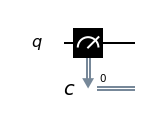

In [2]:
measure_z = QuantumCircuit(1,1) #make a QC with 1 quantum bit and 1 classical bit
measure_z.measure(0,0) # make the 0th qbit map to the classical bit

measure_z.draw(output='mpl')

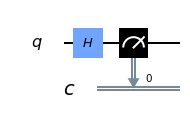

In [3]:
measure_x = QuantumCircuit(1,1) #make a QC with 1 quantum bit and 1 classical bit
measure_x.h(0) #add a hadamard qate to bit 0
measure_x.measure(0,0) #measure the 0th qbit and map to the 0th classical bit

measure_x.draw(output='mpl') #draw the circuit

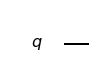

In [4]:
qc_0 = QuantumCircuit(1) #empty circuit

qc_0.draw(output='mpl')

Results for z measurement:


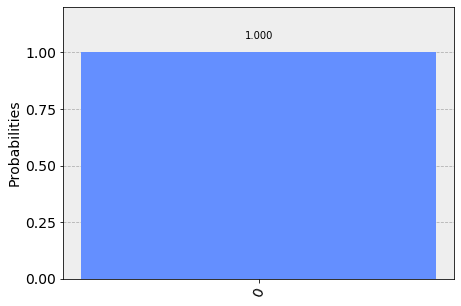

In [5]:
qc = qc_0 + measure_z #add the "z" msmt circuit to the empty one

print('Results for z measurement:')
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts) #do the simulation by getting the Aer backend end, and plot the histogram results, remember the default shots is 1024

Results for x measurement:


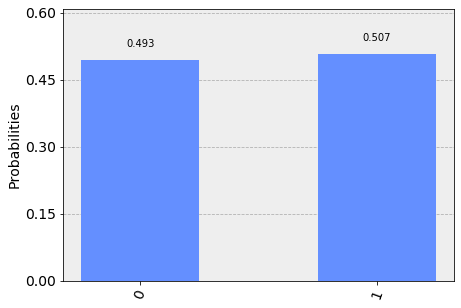

In [6]:
qc = qc_0 +  measure_x

print('Results for x measurement:')
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

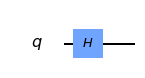

In [7]:
#single hadamard gate
qc_plus = QuantumCircuit(1)
qc_plus.h(0)

qc_plus.draw(output='mpl')

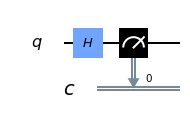

In [11]:
#measure z
qc = qc_plus + measure_z

qc.draw(output='mpl')



Results for z measurement:


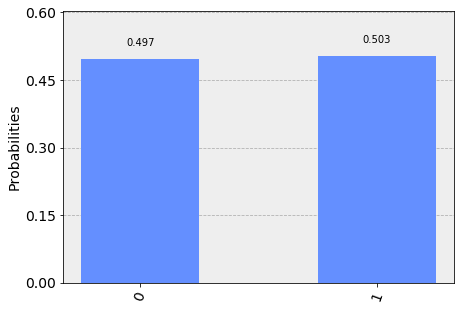

In [10]:
print('Results for z measurement:')
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

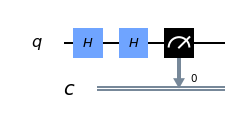

In [12]:
#Now we measure x, we expec TWO hadamard gates:
qc = qc_plus + measure_x
qc.draw(output='mpl')


Results for x measurement:


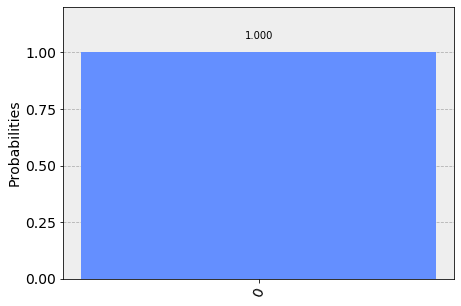

In [13]:
print('Results for x measurement:')
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

In [14]:
#"For the x measurement, it is certain that the output for this circuit is 0. The results here are therefore very different to what we saw for the empty circuit. The Hadamard has lead to an entirely opposite set of outcomes."

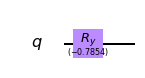

In [16]:
qc_y = QuantumCircuit(1) #make quantum circuit with 1 qbit
qc_y.ry( -3.14159/4,0) #add ry gate to qc #ry gate is I don't know right now but it must put it in some superpos of basis states
#default rY rotation is -0.7854
qc_y.draw(output='mpl') #draw

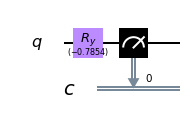

In [17]:
qc = qc_y + measure_z #add the measure z
qc.draw(output='mpl') #draw


Results for z measurement:


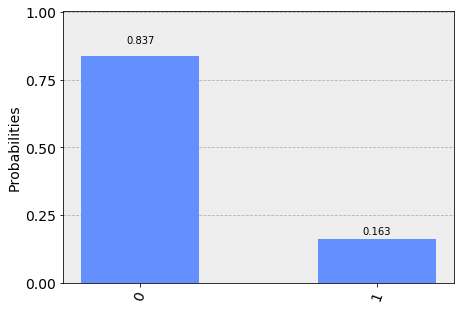

In [19]:

print('Results for z measurement:')
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts() #do the simulation
plot_histogram(counts) #plot the histo

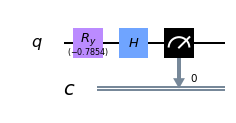

In [22]:
qc = qc_y + measure_x #add a hadamard gate
qc.draw(output='mpl') #draw



Results for x measurement:


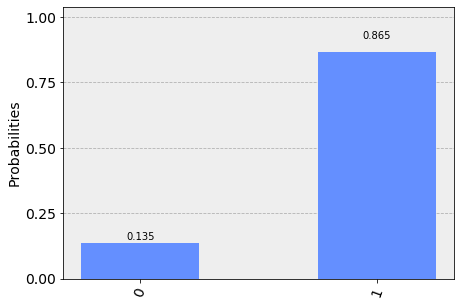

In [21]:
print('\nResults for x measurement:')
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

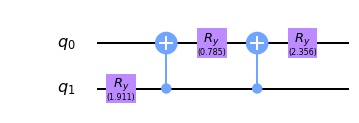

In [23]:
#HARDY PARADOX
qc_hardy = QuantumCircuit(2) #make a quantum circuit with 2 qbits
qc_hardy.ry(1.911,1) #perform a rotation of 1.911 to qbit 1
qc_hardy.cx(1,0) #add a controlled not gate with 0th qbit as control and 1st qbit as target
qc_hardy.ry(0.785,0) #perform a rotation of 0.785 to qbit 0
qc_hardy.cx(1,0) #add a controlled not gate with 0th qbit as control and 1st qbit as target
qc_hardy.ry(2.356,0) #perform a rotation of 2.356 to qbit 0

qc_hardy.draw(output='mpl')


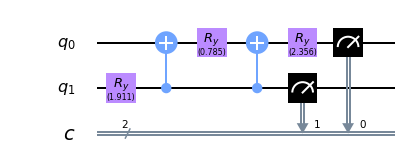

In [24]:
measurements = QuantumCircuit(2,2) #make a qc qith 2 qbits and 2 classical bits
# z measurement on both qubits
measurements.measure(0,0)
measurements.measure(1,1)

qc = qc_hardy + measurements

qc.draw(output='mpl')




Results for two z measurements:


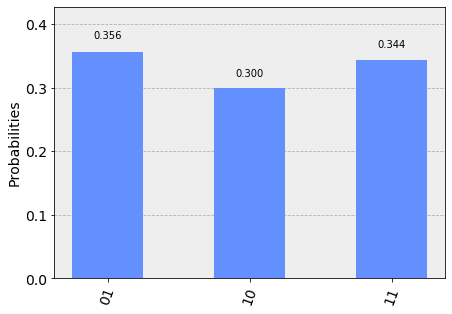

In [25]:
print('\nResults for two z measurements:')
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts() #simulate circuit
plot_histogram(counts)

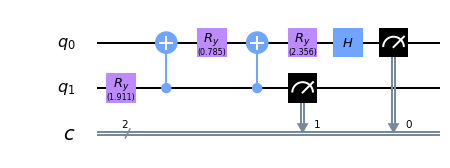

In [26]:
measurements = QuantumCircuit(2,2)
# x measurement on qubit 0
measurements.h(0) #add a hadarmad gate
measurements.measure(0,0) #map 0th qbit to 0th classical bit
# z measurement on qubit 1
measurements.measure(1,1) #map 1st qbit to 1st classical bit

qc = qc_hardy + measurements
qc.draw(output='mpl')


Results for two x measurement on qubit 0 and z measurement on qubit 1:


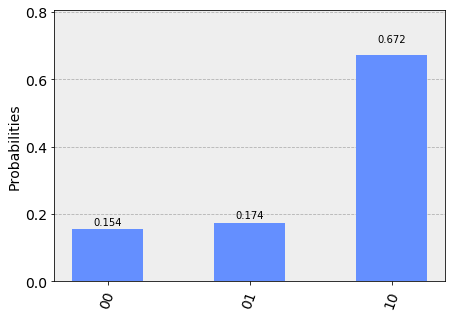

In [27]:
print('\nResults for two x measurement on qubit 0 and z measurement on qubit 1:')
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

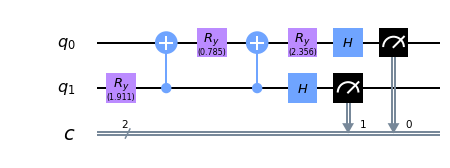

In [30]:
#X OUTPUT of both qbits
measurements = QuantumCircuit(2,2)
measurements.h(0)
measurements.measure(0,0)
measurements.h(1)
measurements.measure(1,1)

qc = qc_hardy + measurements
qc.draw(output='mpl')


Results for two x measurement on both qubits:


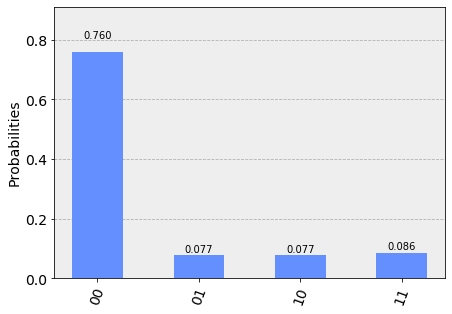

In [31]:
print('\nResults for two x measurement on both qubits:')
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

In [32]:
#"A physical system in a definite state can still behave randomly.""